# Estimating $f$-DP Curve for the Laplacian Mechanism using the BayBox Estimator

## Description

This notebook demonstrates how to use the BayBox estimator API to estimate the entire $f$-DP curve for the Laplacian Mechanism.

In [1]:
import numpy as np
import os
import sys
import time
import matplotlib.pyplot as plt
import logging

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
fig_dir = os.path.join(project_dir, 'fig')
os.makedirs(fig_dir, exist_ok=True)

# Add the src directory to sys.path
sys.path.append(src_dir)

from analysis.tradeoff_Laplace import Laplace_compute_tradeoff_curve

from mech.LapDist import *

In [2]:
kwargs = generate_params(num_train_samples = 100000, num_test_samples = 100000)
estimator = LapDistEstimator(kwargs)

In [3]:
eta_values = np.linspace(0.01, 5, 320)
alpha_values_thm, beta_values_thm = Laplace_compute_tradeoff_curve(eta_values)

In [4]:
output = estimator.build(eta = eta_values, nworkers=32)

In [5]:
alpha_values_estimate = output["alpha"]

beta_values_estimate = output["beta"]

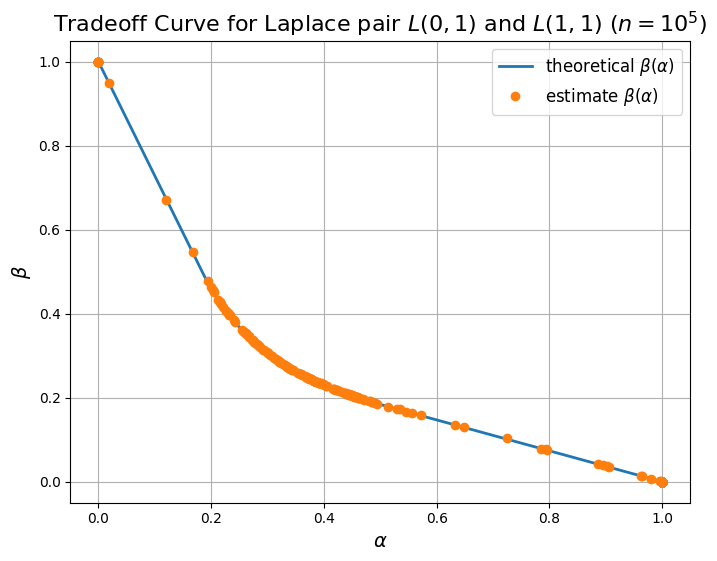

In [6]:
file_name = os.path.join(fig_dir, 'tradeoff_Lap_105.png')
# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(alpha_values_thm, beta_values_thm, label=r"theoretical $\beta(\alpha)$", linewidth=2)
plt.plot(alpha_values_estimate, beta_values_estimate, label=r"estimate $\beta(\alpha)$", linestyle='none', marker='o', linewidth=2)
plt.xlabel(r"$\alpha$", fontsize=14)
plt.ylabel(r"$\beta$", fontsize=14)
plt.title(r"Tradeoff Curve for Laplace pair $L(0,1)$ and $L(1, 1)$ ($n=10^5$)", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.savefig(file_name, bbox_inches = 'tight', dpi = 300);
plt.show()